<a href="https://colab.research.google.com/github/MehrdadDastouri/moon_classification/blob/main/moon_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

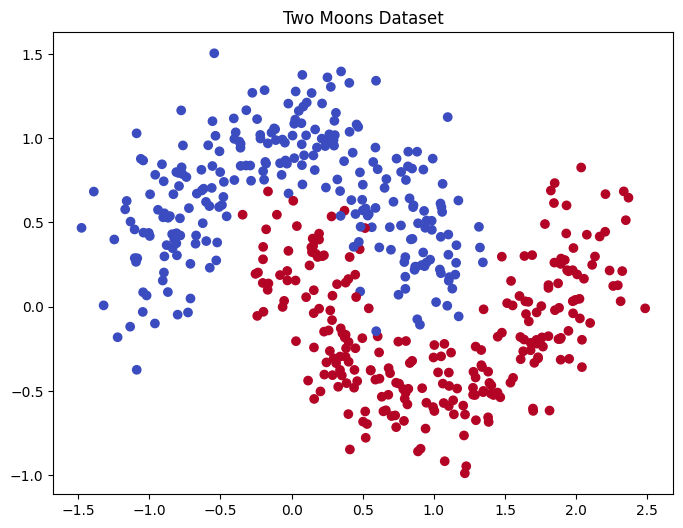

Epoch [100/1000], Loss: 0.2617
Epoch [200/1000], Loss: 0.2184
Epoch [300/1000], Loss: 0.1671
Epoch [400/1000], Loss: 0.1156
Epoch [500/1000], Loss: 0.0856
Epoch [600/1000], Loss: 0.0712
Epoch [700/1000], Loss: 0.0634
Epoch [800/1000], Loss: 0.0583
Epoch [900/1000], Loss: 0.0544
Epoch [1000/1000], Loss: 0.0513


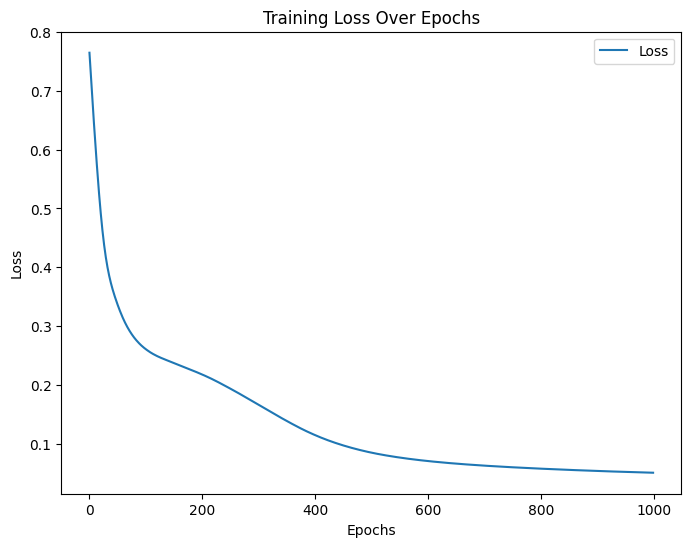

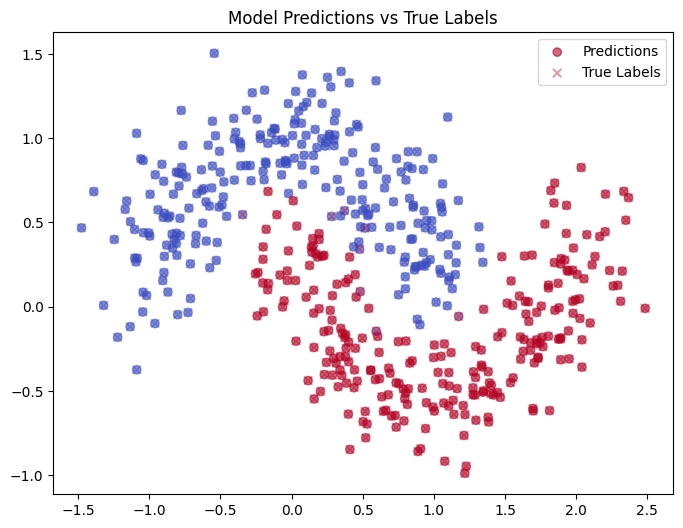

In [1]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate synthetic "two moons" dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
X = torch.tensor(X, dtype=torch.float32)  # Convert to PyTorch tensors
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap="coolwarm")
plt.title("Two Moons Dataset")
plt.show()

# Define the neural network model
class MoonNet(nn.Module):
    def __init__(self):
        super(MoonNet, self).__init__()
        self.hidden = nn.Linear(2, 10)  # Hidden layer with 10 neurons
        self.output = nn.Linear(10, 1)  # Output layer with 1 neuron
        self.activation = nn.Sigmoid()  # Sigmoid activation for binary classification

    def forward(self, x):
        x = torch.relu(self.hidden(x))  # Hidden layer + ReLU activation
        x = self.activation(self.output(x))  # Output layer + Sigmoid activation
        return x

# Initialize the model
model = MoonNet()

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer

# Training the model
epochs = 1000
losses = []
for epoch in range(epochs):
    # Forward pass: predict outputs
    y_pred = model(X)
    # Compute the loss
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    # Update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

# Evaluate the model
with torch.no_grad():
    y_pred = model(X)
    y_pred_class = (y_pred > 0.5).float()  # Convert probabilities to binary classes

# Visualize the classification results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred_class.squeeze(), cmap="coolwarm", marker="o", alpha=0.6, label="Predictions")
plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap="coolwarm", marker="x", label="True Labels", alpha=0.4)
plt.title("Model Predictions vs True Labels")
plt.legend()
plt.show()